In [876]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Question 1

In [877]:
data = {'mother_height':[58,62,60,64,67,70],
        'daughter_height':[60,60,58,60,70,72]}
data

{'mother_height': [58, 62, 60, 64, 67, 70],
 'daughter_height': [60, 60, 58, 60, 70, 72]}

In [878]:
df = pd.DataFrame(data)
df

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [879]:
df.to_csv('w5q1.csv',index=False)

In [880]:
x = df['mother_height'].values
y = df['daughter_height'].values
x = x.reshape(-1,1)

In [881]:
learning_rate = 0.0001
iterations = 24
b0 = 0.1
b1 = 0.001
m = len(y)

#### Using gradient descent

In [882]:
errors = []
for i in range(iterations) :
    y_pred1 = b0 + b1 * x.flatten()
    error = y_pred1-y
    mse = np.mean(error**2)
    errors.append(mse)
    b0 -= learning_rate * (1/m) * np.sum(error)
    b1 -= learning_rate * (1/m) * np.sum(error * x.flatten())

In [883]:
errors

[4020.610082166666,
 1427.8921564561936,
 509.95250603486323,
 184.96026753944486,
 69.89828578140744,
 29.161129138433296,
 14.73832905481597,
 9.632003783766386,
 7.8241328274718684,
 7.184064187548228,
 6.957450493482605,
 6.877218588404912,
 6.848812470784998,
 6.8387550307172305,
 6.835193854081976,
 6.833932649118734,
 6.833485738364501,
 6.833327124665135,
 6.833270581189354,
 6.8332501751990025,
 6.833242563516559,
 6.833239481599296,
 6.833238003424541,
 6.833237093047568]

In [884]:
print(f'Coefficients from Gradient Descent: b0 = {b0}, b1 = {b1}')
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

Coefficients from Gradient Descent: b0 = 0.11548025369108099, b1 = 0.9964147306883873
MSE: 6.833237093047568, RMSE: 2.614046115325353


In [885]:
new_mother_height = 63
predicted_daughter_height = b0 + b1 * new_mother_height
print(f'Predicted Daughter Height for Mother Height {new_mother_height}: {predicted_daughter_height}')

Predicted Daughter Height for Mother Height 63: 62.88960828705948


#### Using sklearn

In [889]:
model = LinearRegression()
model.fit(x, y)
y_pred2 = model.predict(x)
print(f'Coefficients from sklearn: b0 = {model.intercept_}, b1 = {model.coef_[0]}')
mse = np.mean(y-y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

Coefficients from sklearn: b0 = -13.249581239530976, b1 = 1.2060301507537687
MSE: 62.333333333333336, RMSE: 7.895146188218008


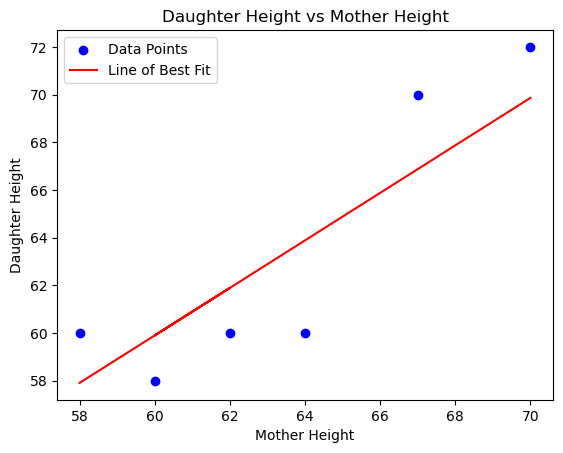

In [890]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred1, color='red', label='Line of Best Fit')
plt.title('Daughter Height vs Mother Height')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.legend()

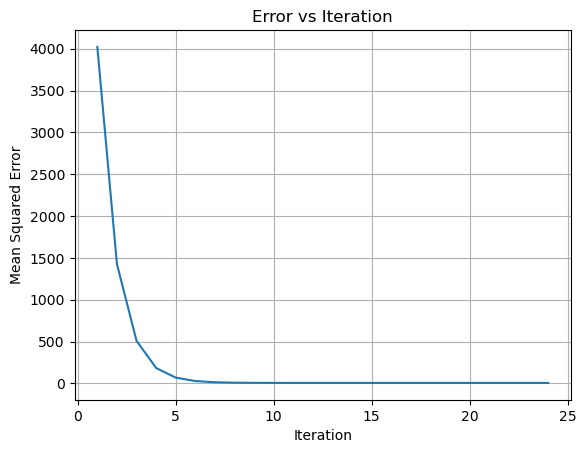

In [891]:
plt.plot(range(1, iterations + 1), errors)
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid()

## Question 2

In [892]:
data = {'Hours of study':[1,2,3,4,5,6,7,8],
        'Pass':[0,0,0,0,1,1,1,1]}

In [893]:
df = pd.DataFrame(data)
df

,Hours of study,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [894]:
df.to_csv('w5q2.csv',index=False)

In [895]:
x = df['Hours of study'].values
y = df['Pass'].values
x = np.c_[np.ones(x.shape[0]), x]

In [896]:
theta = np.random.randn(x.shape[1])
errors = []

In [897]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [898]:
learning_rate = 0.1
iterations = 24
for i in range(iterations):
    z = np.dot(x,theta)
    h = sigmoid(z) 
    error = -y * np.log(h) - (1-y) * np.log(1-h)
    cost = np.mean(error)
    errors.append(cost)
    gradient = np.dot(x.T, (h - y)) / m
    theta -= learning_rate * gradient

In [899]:
errors

[3.838276515602312,
 2.4579738739270702,
 1.2232647512321986,
 0.5900386887068453,
 0.5364459113076769,
 0.5308022984833426,
 0.5273957044972898,
 0.5242542538274139,
 0.5211783480319836,
 0.5181431422247085,
 0.5151449543609387,
 0.5121828565874196,
 0.5092562932678882,
 0.5063647633653077,
 0.5035077777034693,
 0.5006848532994637,
 0.4978955126788998,
 0.4951392838361308,
 0.4924157002642449,
 0.48972430098427033,
 0.4870646305674393,
 0.48443623915117745,
 0.4818386824496126,
 0.4792715217591046]

In [900]:
print(f'Coefficients from Gradient Descent: {theta}')

Coefficients from Gradient Descent: [-0.84202121  0.32632082]


In [901]:
predictions = sigmoid(np.dot(x, theta))
y_pred1 = (predictions >= 0.5).astype(int)
accuracy1 = np.mean(y_pred1 == y) * 100
print("Accuracy from Gradient Descent:", accuracy)

Accuracy from Gradient Descent: 62.5


In [905]:
study_hours = np.array([[1, 3.5], [1, 7.5]])  # Including bias term
probabilities = sigmoid(np.dot(study_hours, theta))
print(f"Probability of passing for 3.5 hours: {probabilities[0]*100} %")
print(f"Probability of passing for 7.5 hours: {probabilities[1]*100} %")

Probability of passing for 3.5 hours: 57.44673733725505 %
Probability of passing for 7.5 hours: 83.27696653885307 %


In [906]:
model = LogisticRegression()
clf = model.fit(df[['Hours of study']], df['Pass'])
print(f'Coefficients from sklearn: {model.coef_[0]}')

Coefficients from sklearn: [1.16979937]


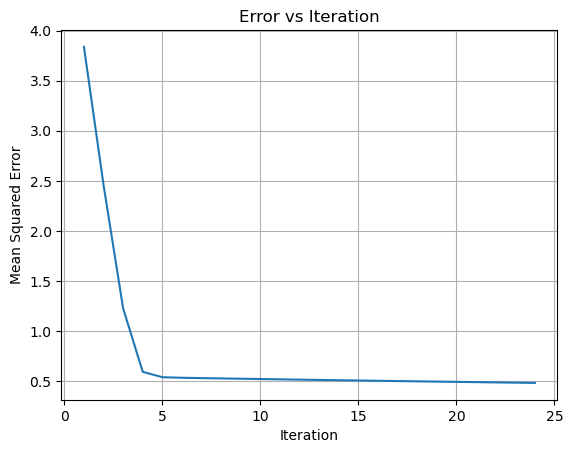

In [907]:
plt.plot(range(1, iterations + 1), errors)
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid()

## Question 3

In [913]:
data = {
    'x1': [4, 2, 1, 3, 1, 6],
    'x2': [1, 8, 0, 2, 4, 7],
    'y': [2, -14, 1, -1, -7, -8]
}
df = pd.DataFrame(data)

In [915]:
def compute_logistic_cost(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

Final Weight=[ 0.26887698 -0.73693986] Bias=0.1272134582881574
Final Error:0.2658140606672452


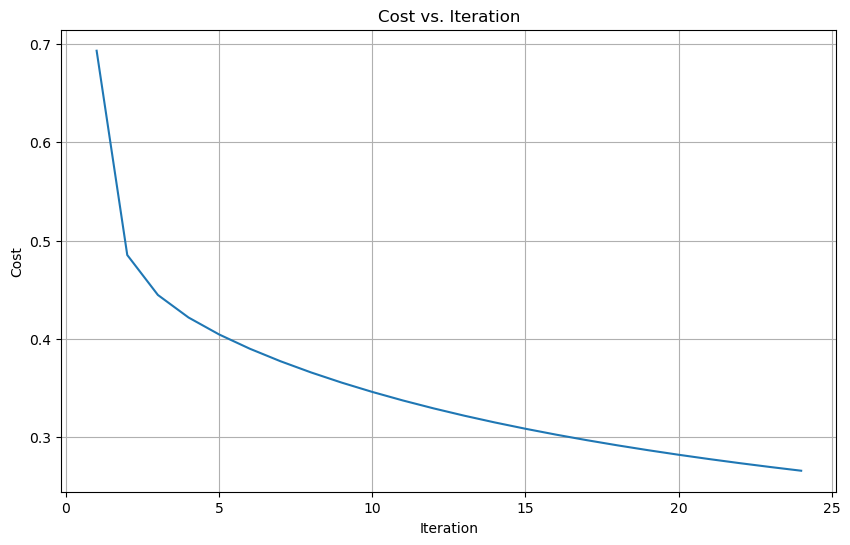

In [917]:
X = df[['x1', 'x2']].values
y = (df['y'] > 0).astype(int)

learningrate=0.1
iterations=24

weight,bias=np.zeros(X.shape[1]),0
n=float(len(X))
costs=[]
weights=[]

for i in range(iterations):
    y_pred = sigmoid(bias + np.dot(X,weight))
    cost=compute_logistic_cost(y,y_pred)
    costs.append(cost)
    weights.append(weight)
    
    weight_derivative = (1 / n) * np.dot(X.T, (y_pred - y))
    bias_derivative = (1 / n) * np.sum(y_pred - y)
    weight=weight-(learningrate*weight_derivative)
    bias=bias-(learningrate*bias_derivative)
    #print(f"{i+1}th Iteration: Weight={weight} Bias={bias}")
print(f"Final Weight={weight} Bias={bias}")
    

iterations_range = range(1, len(costs) + 1)
print(f"Final Error:{costs[-1]}")
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.grid(True)
plt.show()